# mySUNI-WorkShop-실거래가 분석 (1)을 먼저 진행해주세요.

# 데이터 시각화

In [1]:
# 모듈 import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [2]:
# 필요한 데이터를 읽어옵니다.
# 파일 이름은 '2020년 서울시 아파트 실거래가_merge.csv',
# encoding 옵션은 'cp949' 를 사용합니다.
df = pd.read_csv("./data/2020년 서울시 아파트 실거래가_merge.csv", encoding="cp949")
df.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지번,층,전용면적(평),반기,평당거래금액,시도명,시군구명
0,2007,2020,1,3,필운동,100000,신동아블루아광화문의 꿈,111.97,254,6,33.87,상반기,2952.465309,서울특별시,종로구
1,2008,2020,1,2,사직동,162000,광화문풍림스페이스본(106동),163.33,9-1,2,49.40,상반기,3279.352227,서울특별시,종로구
2,1994,2020,1,6,내수동,88000,세종로대우,109.91,167,11,33.25,상반기,2646.616541,서울특별시,종로구
3,2004,2020,1,9,내수동,130000,킹스매너,194.43,110-15,4,58.81,상반기,2210.508417,서울특별시,종로구
4,2003,2020,1,20,내수동,149000,경희궁 파크팰리스,148.09,95,8,44.79,상반기,3326.635410,서울특별시,종로구


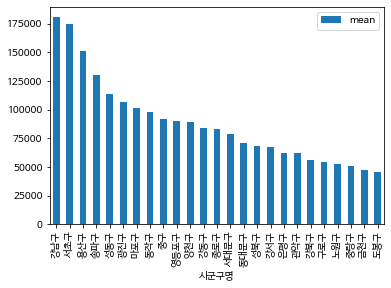

In [3]:
# groupby를 사용해서 시군구 별 총 거래금액의 평균을 구하고,
# 큰 순서대로 정렬해서 temp 변수에 저장합니다.
temp = df.groupby(by=['시군구명'])['거래금액'].agg(['mean']).sort_values(by='mean', ascending=False)

# 위의 temp 데이터를 bar차트로 시각화 합니다.
temp.plot(kind='bar')

In [6]:
# 거래월과 시군구명을 기준으로 거래된 건수를 카운트하고,
# 거래된 수에 따라 내림차순으로 정렬해서 temp 변수에 저장하세요.
temp = df.groupby(by=['거래월', '시군구명'])['거래금액'].agg(['size']).sort_values(by='size',ascending=False)

temp

size
거래월 시군구명      
6   노원구   1722
2   노원구   1154
6   송파구   1134
    강서구   1128
7   강서구    956
...        ...
3   용산구     37
4   중구      35
9   종로구     34
4   용산구     31
    종로구     27

[300 rows x 1 columns]

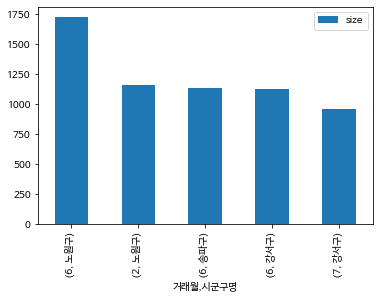

In [7]:
# 위 데이터의 상위 5개 지역을 시각화 합니다.
temp.head(5).plot(kind='bar')

In [8]:
# 피벗 테이블 이용하여 거래월과 시군구별 평균거래금액을 계산합니다.
temp = df.pivot_table(index='시군구명',columns='거래월',values='거래금액',aggfunc='mean')

temp

거래월,1,2,3,4,5,6,7,8,9,10,11,12
시군구명,,,,,,,,,,,,
강남구,155214.885496,161472.139241,170534.074074,195801.034483,170656.595166,182113.902408,169026.709589,198072.775330,184498.898305,174962.288372,184444.866029,197931.099567
강동구,65255.148810,69415.660714,63053.030303,65905.511811,70486.088328,87377.726751,87461.863799,92148.439490,92016.540000,87667.948718,96851.981707,104075.852941
강북구,46467.603834,51212.213740,53343.167702,49934.848485,51229.090909,59997.035040,60216.908213,58783.157895,64178.205128,52543.442623,60168.691589,70411.708861
강서구,62355.741176,61398.246187,57556.801619,54620.904255,62068.807339,66513.385638,68633.023013,72645.760291,72789.603960,72637.848485,76165.526316,76454.491726
관악구,57154.978723,57703.310811,56261.179775,55616.115108,55616.363636,65763.320080,61053.026846,62855.603448,64293.965517,63991.796875,69387.821229,72498.944954
광진구,93384.126984,89947.787611,93927.884615,80750.000000,92458.227848,105991.266376,109531.958763,117256.451613,121448.026316,116535.416667,111753.809524,121891.796875
구로구,50933.623025,50332.526132,48740.451613,46793.231441,49775.393258,58070.792824,61237.041742,59327.821012,57668.082192,53159.192308,50339.200864,62308.340541
금천구,47821.480000,45375.945946,36773.750000,41611.132075,45000.505051,48519.736842,50839.080460,61443.820225,54252.238806,48936.567164,59784.051724,40210.313725
노원구,46471.546012,45885.918544,46298.256000,45767.115903,47741.175523,50326.271777,56000.431499,58932.598425,60398.538961,58041.772152,61767.338710,61089.379845


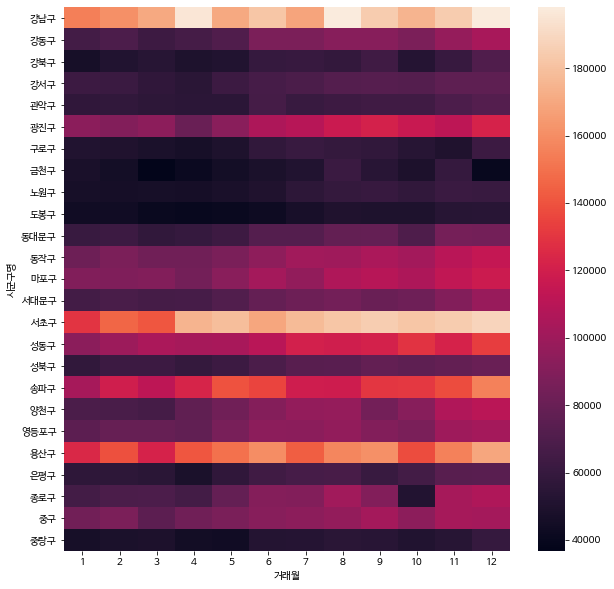

In [9]:
plt.figure(figsize=(10,10))

# 위 temp 데이터(평균거래금액)를 heatmap으로 시각화 합니다.
sns.heatmap(temp)

In [10]:
# 거래월과 시군구별 거래량(거래 건 수)을 피벗테이블로 생성하고,
# temp 변수에 저장합니다.
temp = df.pivot_table(index='시군구명',columns='거래월',values='거래금액',aggfunc='count')

temp

거래월,1,2,3,4,5,6,7,8,9,10,11,12
시군구명,,,,,,,,,,,,
강남구,131,237,135,145,331,789,365,227,177,215,418,462
강동구,336,392,165,127,317,871,558,314,200,195,328,340
강북구,313,262,161,99,132,371,207,95,78,122,107,158
강서구,425,459,247,188,327,1128,956,413,303,330,456,423
관악구,235,296,178,139,165,503,298,116,116,128,179,218
광진구,63,113,52,40,79,229,194,93,76,72,105,128
구로구,443,574,310,229,356,864,551,257,219,234,463,370
금천구,125,185,176,53,99,228,174,89,67,67,116,255
노원구,815,1154,625,371,621,1722,927,381,308,395,620,774


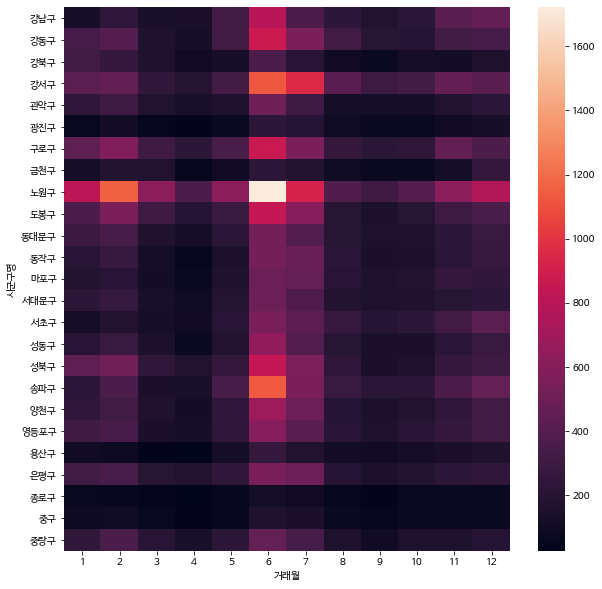

In [11]:
plt.figure(figsize=(10,10))

# 위 temp 데이터(거래량)를 heatmap으로 시각화 합니다.
sns.heatmap(temp)

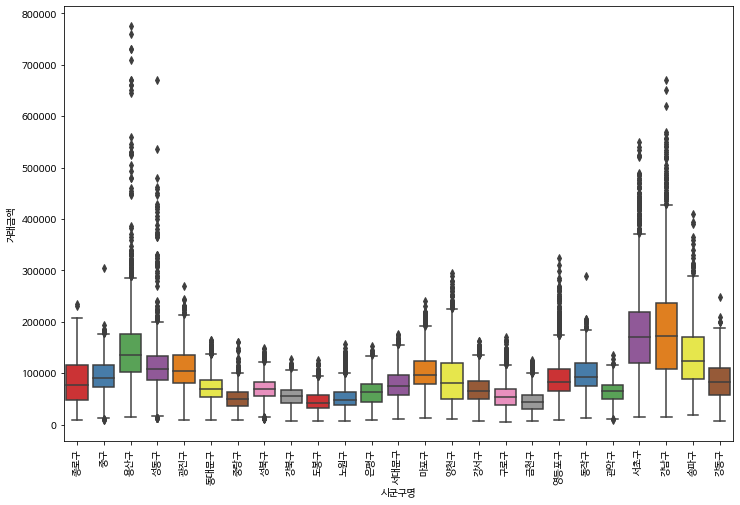

In [12]:
plt.figure(figsize=(12,8))

# 원본 데이터(df)의 시군구별 거래 금액을 boxplot을 이용하여 시각화 해보세요.
sns.boxplot(x="시군구명", y="거래금액", data=df, palette="Set1")


plt.xticks(rotation=90)
plt.show()

In [13]:
# 평균 거래 금액이 높은 상위 30개의 아파트 단지를 추출해서,
# temp 변수에 저장하세요.
temp = df.groupby('아파트이름')['거래금액'].agg(['mean']).sort_values('mean', ascending=False).head(30)

temp

,mean
아파트이름,
효성빌라 청담101(A동),620000.000000
상지리츠빌 카일룸,565400.000000
청담 어퍼하우스,519500.000000
한양8(81동한개동),491600.000000
아펠바움,480000.000000
로덴하우스 웨스트빌리지,471666.666667
한남더힐,470461.538462
삼성동라테라스,470000.000000
트라움하우스3,460000.000000


In [14]:
# 위에서 생성한 temp의 index만 추출해서,
# 평균 거래 금액이 높은 상위 30개의 아파트 이름을 뽑아냅니다.
apt_names = temp.index

apt_names

Index(['효성빌라 청담101(A동)', '상지리츠빌 카일룸', '청담 어퍼하우스', '한양8(81동한개동)', '아펠바움',
       '로덴하우스 웨스트빌리지', '한남더힐', '삼성동라테라스', '트라움하우스3', '레베빌', 'UPPER HOUSE 2',
       '논현라폴리움', '신현대11차', '현대7차(73~77,82,85동)', '현대2차(10,11,20,23,24,25동)',
       '압구정하이츠파크', '상지리츠빌카일룸(1009-4)', '로덴하우스 이스트빌리지', '상지리츠빌카일룸3차', '갤러리아 포레',
       '이니그마빌2', '현대1차(12,13,21,22,31,32,33동)', '반포 주공1단지', '레베빌(798-1)',
       '현대6차(78~81,83,84,86,87동)', '이니그마빌', '선데일', '대우로얄카운티3',
       '현대4차저층(51~56동)', '현대하이페리온II'],
      dtype='object', name='아파트이름')

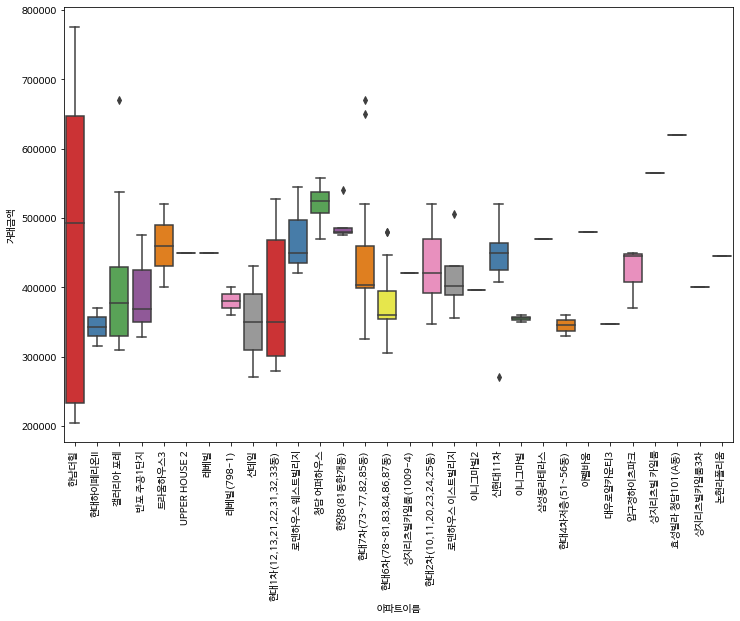

In [16]:
# 위에서 구한 아파트의 데이터만 추출해서 result 변수에 저장합니다.
result = df[df['아파트이름'].isin(apt_names)]

# 시각화
plt.figure(figsize=(12,8))

# 추출한 데이터의 아파트별 거래 금액의 분포를 boxplot를 통해 표현하세요.
sns.boxplot(x="아파트이름", y="거래금액", data=result, palette="Set1")


plt.xticks(rotation=90)
plt.show()